<a href="https://colab.research.google.com/github/visheshvish/Exploratory-Data-Analysis-Projects-/blob/main/Data_Analysis_of_Amazon_Top_50_Bestselling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Reading CSV file
data = pd.read_csv("/content/bestsellers with categories.csv") #("Dataset path")

In [16]:
data.head() # This will return first 5 rows of Dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [17]:
data.columns #Return columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [18]:
data.shape #Return numbers of rows and columns

(550, 7)

In [19]:
data.describe() #Gives the Statistics of the Dataset

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [20]:
data.info() #Returns all the types of data of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [21]:
data.isnull().any() # To check is any null value from the dataset

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [22]:
data.isnull().sum() # It will gives the summation of total null values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

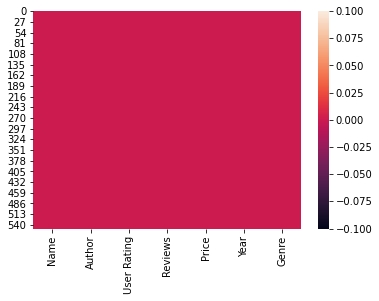

In [24]:
sns.heatmap(data.isnull()) #heatmap gives co-relation between column
plt.show()

In [25]:
data.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

# Outlire Detection and treatment
- Outlier Detection 
- Outliers are extreme values that deviate from other observation on data, they may indicate a variability in a measurement, experimental errors or a novelty.

- Boxplots are a Great Way of detecting outliers.
- Once outlires have been detected they can be imputed with the 5th and 95th percentiles.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


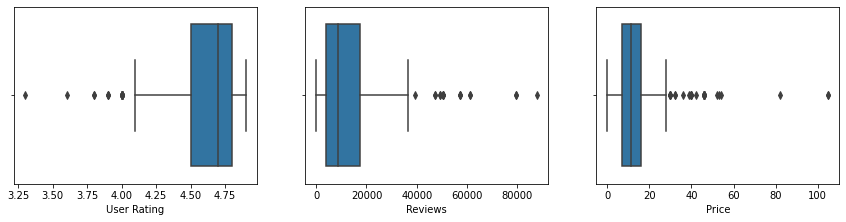

In [28]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

# dots are outliers in the plotted boxplot

- These lower level outliers will be replaced by the 5th and 95th %ile respectively 

## ```numpy.clip()``` function is used to clip (limit) the values in an array.

# Syntax : 
```numpy.clip(a,a_min,a_max,out=None)```

#Parameters :
-  ```a``` : Array containing elements to clip.
-  ```a_min``` : minimum value.
-  ```a_max``` : Maximum value.
-  If ```None``` cliping is not performed on lower interval edge.
-  Not more than one of ```a_min``` & ```a_max``` be ```None```.

In [29]:
data['Price'] = data['Price'].clip(lower = data['Price'].quantile(0.05), upper = data['Price'].quantile(0.95))

In [30]:
data['User Rating'] = data['User Rating'].clip(lower = data['User Rating'].quantile(0.05), upper = data['User Rating'].quantile(0.95))

In [32]:
data['Reviews'] = data['Reviews'].clip(lower = data['Reviews'].quantile(0.05), upper = data['Reviews'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


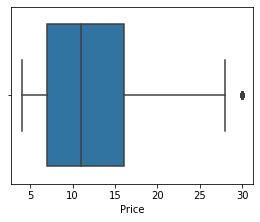

In [47]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,2)
sns.boxplot(data['Price'])

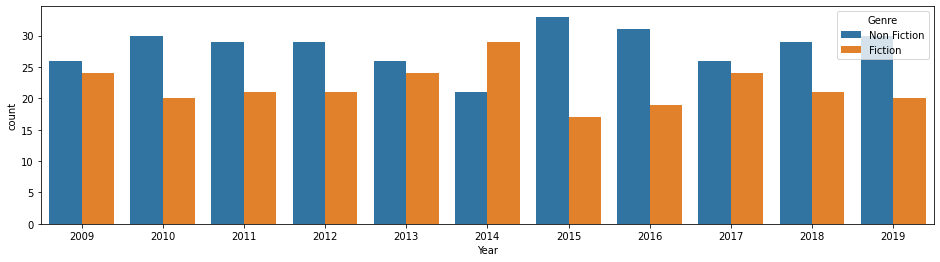

In [42]:
plt.figure(figsize=(16,4))

sns.countplot(x= 'Year', data = data, hue= 'Genre' )

## Above explored trend over year for each genre :
- Number of best selling books in each genre each year.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    float64
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


## Author

-  [@VisheshVishwakarma](https://www.linkedin.com/in/vishesh-vishwakarma)

## Dataset

[Amazon Top 50 Best-Selling Books 2009-2019](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)